In [1]:
import numpy as np
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

#for feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv(url)

In [3]:
# Display the first few rows
print(titanic_data.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [4]:
# Get a summary of the data
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


In [5]:
# Descriptive statistics
print(titanic_data.describe())

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

In [6]:
# Data Selection and Filtering
# Select a single column
ages = titanic_data['Age']
print(ages.head())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [7]:
# Select multiple columns
subset = titanic_data[['Name', 'Sex', 'Age', 'Fare', 'Survived']]
print(subset.head())

                                                Name     Sex   Age     Fare  \
0                             Mr. Owen Harris Braund    male  22.0   7.2500   
1  Mrs. John Bradley (Florence Briggs Thayer) Cum...  female  38.0  71.2833   
2                              Miss. Laina Heikkinen  female  26.0   7.9250   
3        Mrs. Jacques Heath (Lily May Peel) Futrelle  female  35.0  53.1000   
4                            Mr. William Henry Allen    male  35.0   8.0500   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


In [8]:
# Filter rows based on a condition
survived = titanic_data[titanic_data['Survived'] == 1]
print(survived.head())

   Survived  Pclass                                               Name  \
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
8         1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9         1       2                 Mrs. Nicholas (Adele Achem) Nasser   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
8  female  27.0                        0                        2  11.1333  
9  female  14.0                        1                        0  30.0708  


2. Data Cleaning

In [9]:
pwd

'/Users/gkim2/working/ml'

In [10]:
# Load the Titanic dataset
penguin_data = pd.read_csv("../../Downloads/penguins_lter.csv")

In [11]:
# Check for missing values
print(penguin_data.isnull().sum())

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


In [12]:
# Handle missing values
# For 'Culmen Length (mm)', we'll use the median
penguin_data['Culmen Length (mm)'] = penguin_data['Culmen Length (mm)'].fillna(penguin_data['Culmen Length (mm)'].median())

# For 'Culmen Depth (mm)', we'll use the median
penguin_data['Culmen Depth (mm)'] = penguin_data['Culmen Depth (mm)'].fillna(penguin_data['Culmen Depth (mm)'].median())

# For 'Flipper Length (mm)', we'll use the mode
penguin_data['Flipper Length (mm)'] = penguin_data['Flipper Length (mm)'].fillna(penguin_data['Flipper Length (mm)'].mode())

# For 'Body Mass (g)', we'll use the mode
penguin_data['Body Mass (g)'] = penguin_data['Body Mass (g)'].fillna(penguin_data['Body Mass (g)'].mode())

# For 'Delta 15 N (o/oo)', we'll use the median
penguin_data['Delta 15 N (o/oo)'] = penguin_data['Delta 15 N (o/oo)'].fillna(penguin_data['Delta 15 N (o/oo)'].median())

# For 'Delta 13 C (o/oo)', we'll use the median
penguin_data['Delta 13 C (o/oo)'] = penguin_data['Delta 13 C (o/oo)'].fillna(penguin_data['Delta 13 C (o/oo)'].median())

In [13]:
# Check for missing values
print(penguin_data.isnull().sum())

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               318
dtype: int64


In [14]:
# For 'Sex ', we'll write 'N/A'
penguin_data['Sex'] = penguin_data['Sex'].fillna("N/A")

# For 'Comments', we'll write 'No comments'
penguin_data['Comments'] = penguin_data['Comments'].fillna("No Comments")


In [15]:
# Check for missing values
print(penguin_data.isnull().sum())

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    2
Body Mass (g)          2
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64


In [16]:
# Check for missing values
print(titanic_data.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [17]:
# Data Type Conversion
# Convert 'Survived' to string for easier interpretation
titanic_data['Survived'] = titanic_data['Survived'].map({0: 'No', 1: 'Yes'})

In [18]:
# Handle Duplicates
# Check for duplicate rows
print(titanic_data.duplicated().sum())

0


In [19]:
# Remove duplicate rows if any
titanic_data = titanic_data.drop_duplicates()

3. Data Visualization

In [20]:
# Set up the plotting style
sns.set_style("whitegrid")

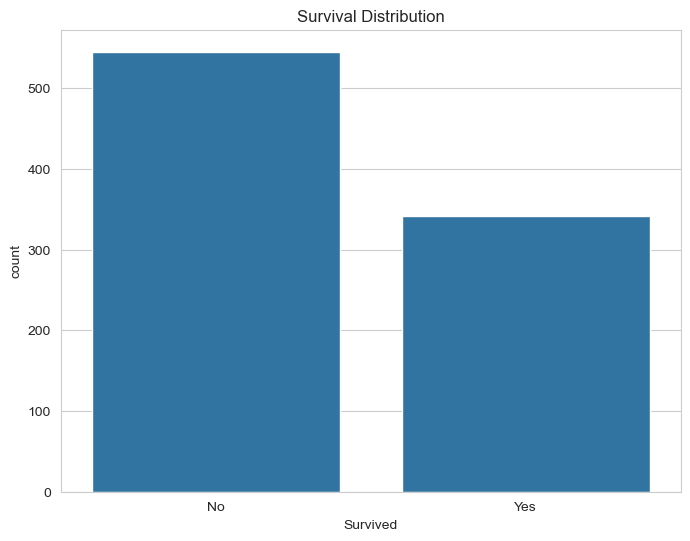

In [21]:
# Survival Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Distribution')
plt.show()

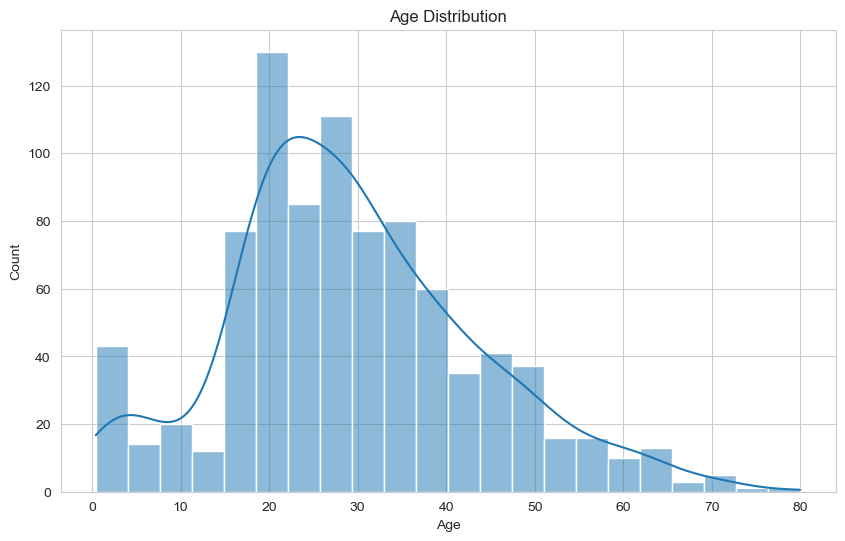

In [22]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

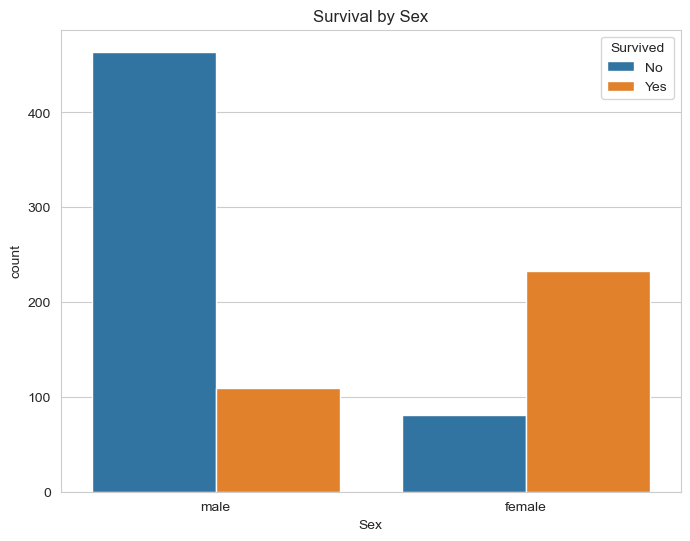

In [23]:
# Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival by Sex')
plt.show()

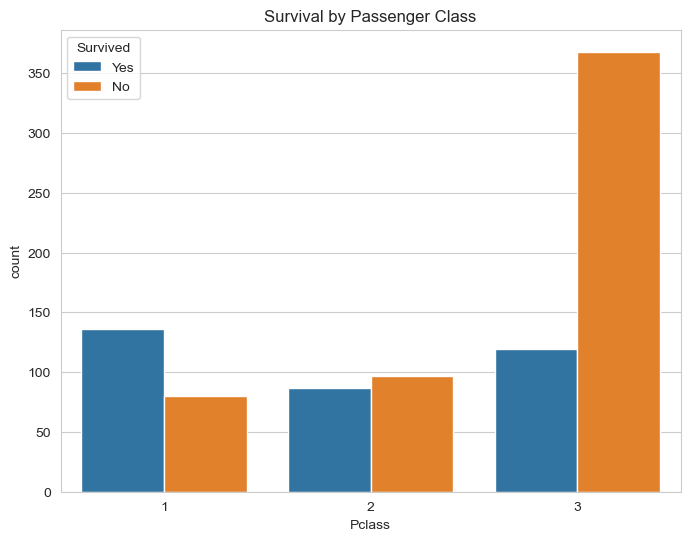

In [24]:
# Survival by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.show()

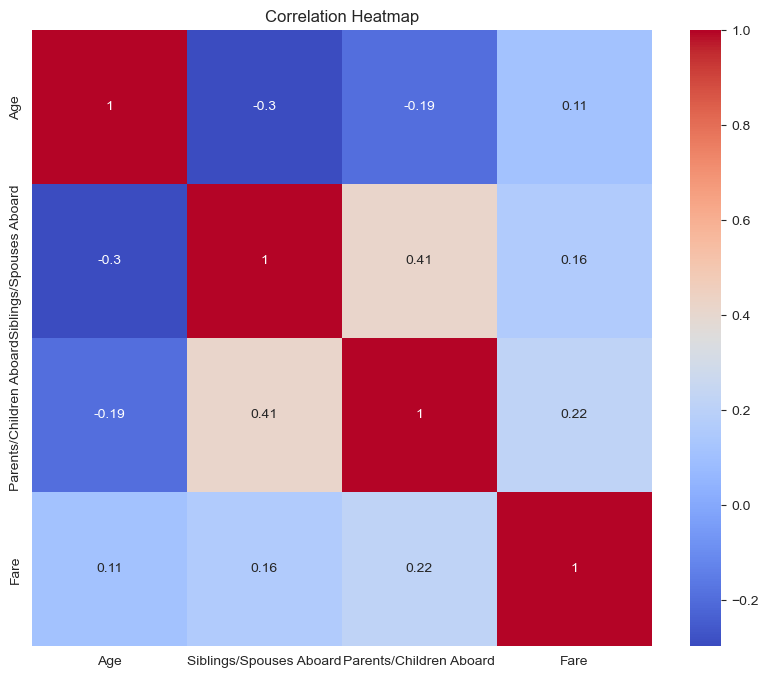

In [25]:
# Correlation Heatmap
numeric_features = ['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

4. Scaling and Normalization

In [26]:
# set seed for reproducibility
np.random.seed(0)

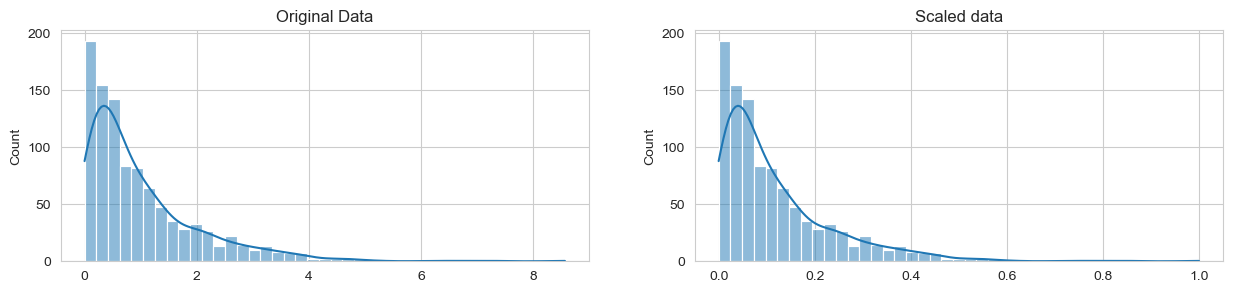

In [27]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

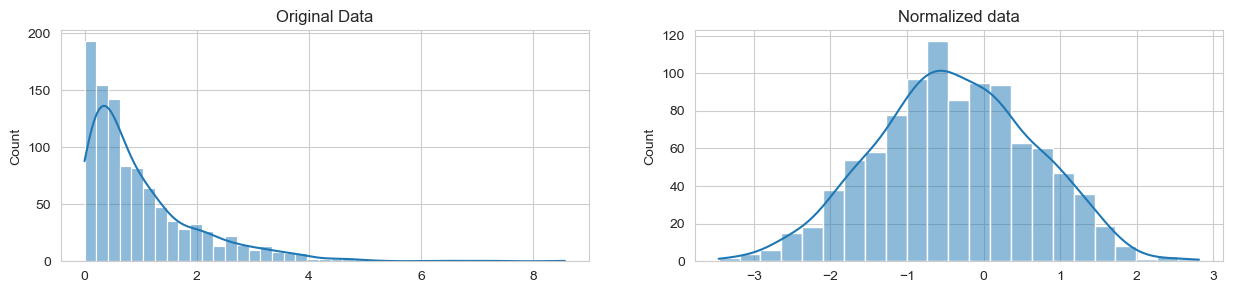

In [28]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

5. Feature Engineering

In [29]:
# Create a new feature: Family Size
titanic_data['FamilySize'] = titanic_data['Siblings/Spouses Aboard'] + titanic_data['Parents/Children Aboard'] + 1

In [30]:
# Create age groups
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [31]:
# Extract title from Name
titanic_data['Title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/7l/3ysc8_b96qz_9yk3fg8v_vkh0000gn/T/ipykernel_24911/2956165563.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic_data['Title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [32]:
# Group rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic_data['Title'] = titanic_data['Title'].replace(rare_titles, 'Rare')

In [33]:
# Print the first few rows to see the new features
print(titanic_data[['Name', 'FamilySize', 'AgeGroup', 'Title']].head())

                                                Name  FamilySize     AgeGroup  \
0                             Mr. Owen Harris Braund           2  Young Adult   
1  Mrs. John Bradley (Florence Briggs Thayer) Cum...           2        Adult   
2                              Miss. Laina Heikkinen           1  Young Adult   
3        Mrs. Jacques Heath (Lily May Peel) Futrelle           2  Young Adult   
4                            Mr. William Henry Allen           1  Young Adult   

  Title  
0    Mr  
1   Mrs  
2  Miss  
3   Mrs  
4    Mr  


6. Preparing Data for Machine Learning

In [34]:
# Select features for the model
features = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'FamilySize', 'Title']
X = titanic_data[features]
y = titanic_data['Survived']

In [35]:
# Create preprocessing pipelines
numeric_features = ['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Title']

In [36]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [37]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [39]:
# Fit the preprocessor to the data
X_processed = preprocessor.fit_transform(X)

In [40]:
print("Shape of processed features:", X_processed.shape)

Shape of processed features: (887, 18)


Conclusion

In this tutorial, we've covered:

Loading and exploring data with Pandas
Cleaning data by handling missing values and duplicates
Visualizing data using Matplotlib and Seaborn
Scaling and Normalizing data
Feature engineering to create new informative features
Preparing data for machine learning


Next steps could include:
6. Trying different visualization techniques
7. Experimenting with more feature engineering ideas

<Figure size 1000x800 with 0 Axes>

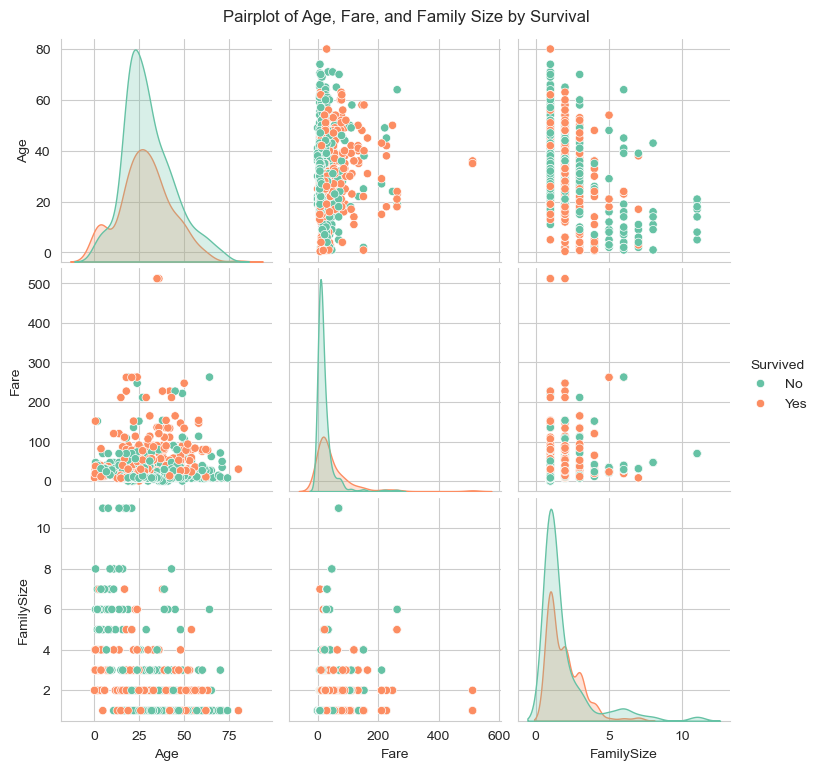

In [41]:
plt.figure(figsize=(10, 8))
sns.pairplot(titanic_data, hue='Survived', vars=['Age', 'Fare', 'FamilySize'], palette='Set2')
plt.suptitle('Pairplot of Age, Fare, and Family Size by Survival', y=1.02)
plt.show()

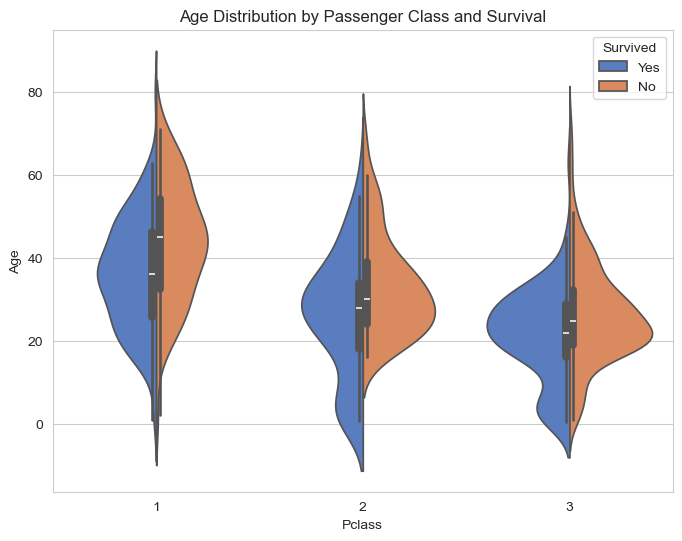

In [42]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, split=True, palette='muted')
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

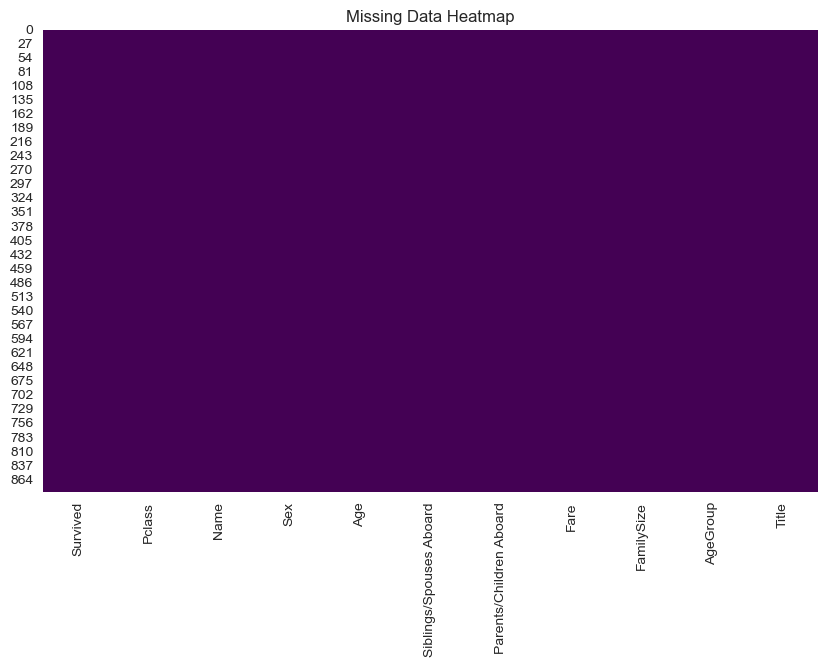

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

/var/folders/7l/3ysc8_b96qz_9yk3fg8v_vkh0000gn/T/ipykernel_24911/3407131275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Pclass', y='Fare', data=titanic_data, palette='coolwarm')


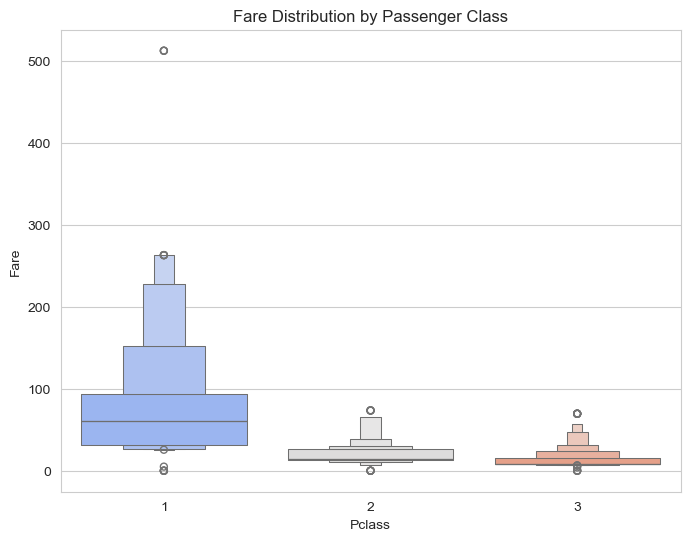

In [44]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Pclass', y='Fare', data=titanic_data, palette='coolwarm')
plt.title('Fare Distribution by Passenger Class')
plt.show()

/var/folders/7l/3ysc8_b96qz_9yk3fg8v_vkh0000gn/T/ipykernel_24911/3541524664.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = titanic_data.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack()


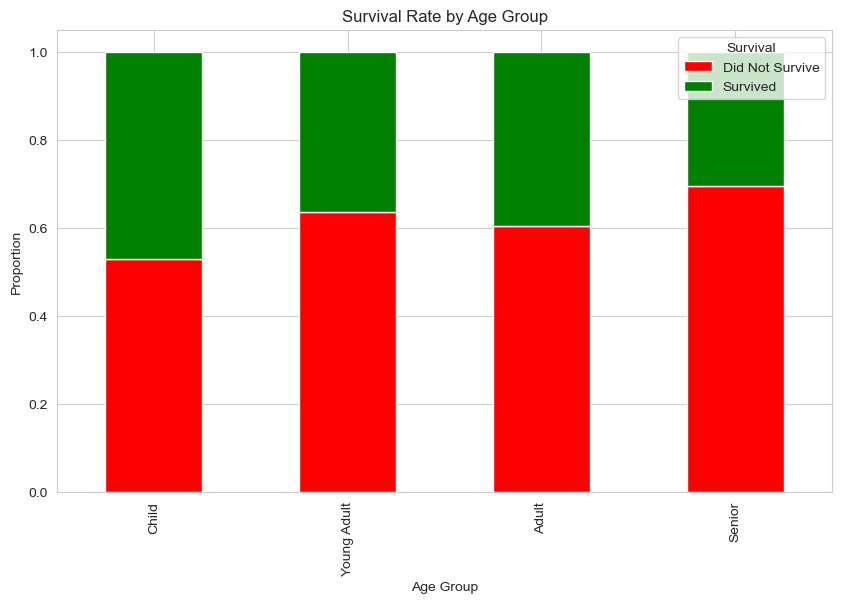

In [45]:
# #### 6.5 Survival Rate by Age Group (Bar Plot)
age_group_survival = titanic_data.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack()
age_group_survival.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Survival Rate by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(['Did Not Survive', 'Survived'], title="Survival")
plt.show()

/opt/miniconda3/envs/py312/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/py312/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/py312/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/py312/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/py312/lib/python3.12/site-packag

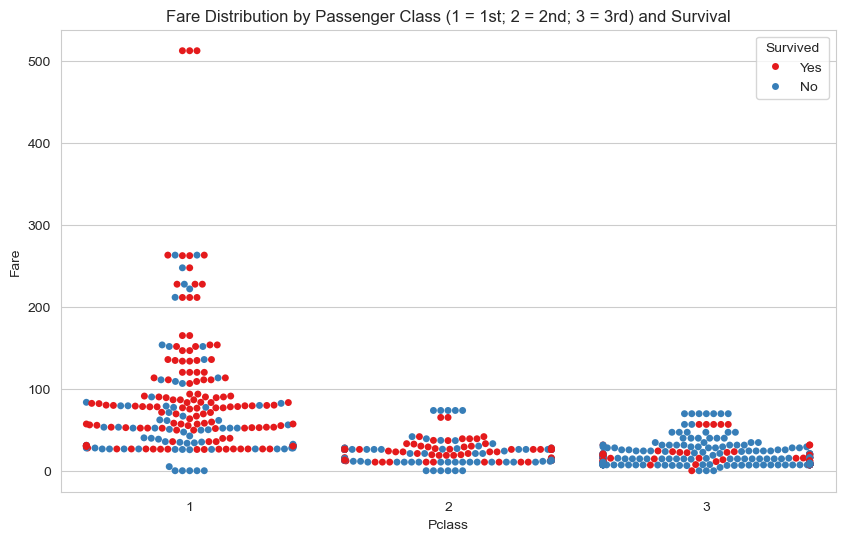

In [46]:
# #### 6.6 Fare Distribution by Embarked Port (Swarm Plot)
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Pclass', y='Fare', hue='Survived', data=titanic_data, palette='Set1')
plt.title('Fare Distribution by Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) and Survival')
plt.show()

In [47]:
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)  # 1 if alone, 0 otherwise

In [48]:
print(titanic_data[['FamilySize', 'IsAlone']].head())

   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


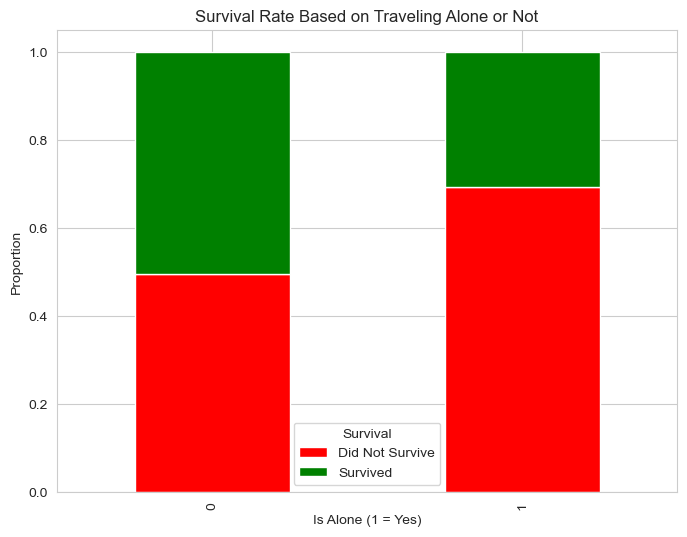

In [49]:
# Visualize survival rates based on whether passengers were alone or not
alone_survival = titanic_data.groupby('IsAlone')['Survived'].value_counts(normalize=True).unstack()
alone_survival.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])
plt.title('Survival Rate Based on Traveling Alone or Not')
plt.ylabel('Proportion')
plt.xlabel('Is Alone (1 = Yes)')
plt.legend(['Did Not Survive', 'Survived'], title="Survival")
plt.show()

In [50]:
titanic_data['FarePerPerson'] = titanic_data['Fare'] / titanic_data['FamilySize']
print(titanic_data[['Fare', 'FamilySize', 'FarePerPerson']].head())

      Fare  FamilySize  FarePerPerson
0   7.2500           2        3.62500
1  71.2833           2       35.64165
2   7.9250           1        7.92500
3  53.1000           2       26.55000
4   8.0500           1        8.05000


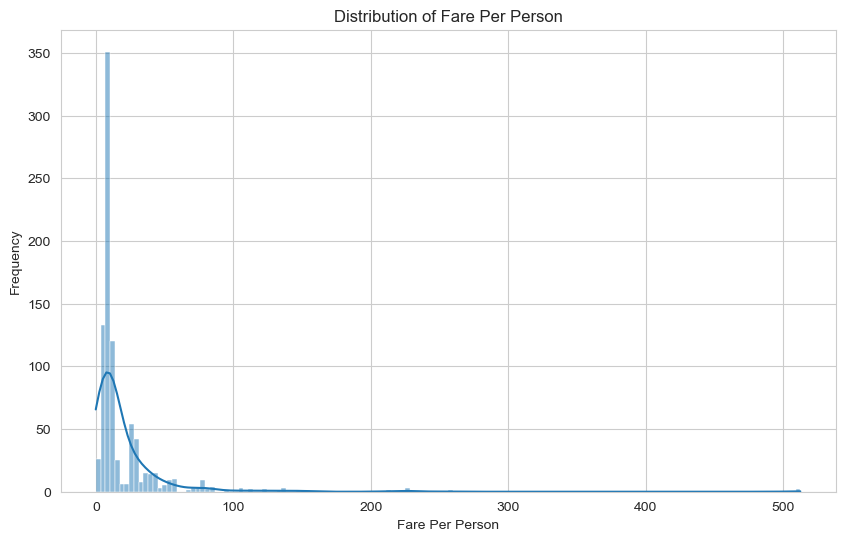

In [51]:
# Visualize Fare Per Person distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['FarePerPerson'], kde=True)
plt.title('Distribution of Fare Per Person')
plt.xlabel('Fare Per Person')
plt.ylabel('Frequency')
plt.show()

In [52]:
titanic_data['Pclass_Sex'] = titanic_data['Pclass'].astype(str) + '_' + titanic_data['Sex']
print(titanic_data[['Pclass', 'Sex', 'Pclass_Sex']].head())

   Pclass     Sex Pclass_Sex
0       3    male     3_male
1       1  female   1_female
2       3  female   3_female
3       1  female   1_female
4       3    male     3_male


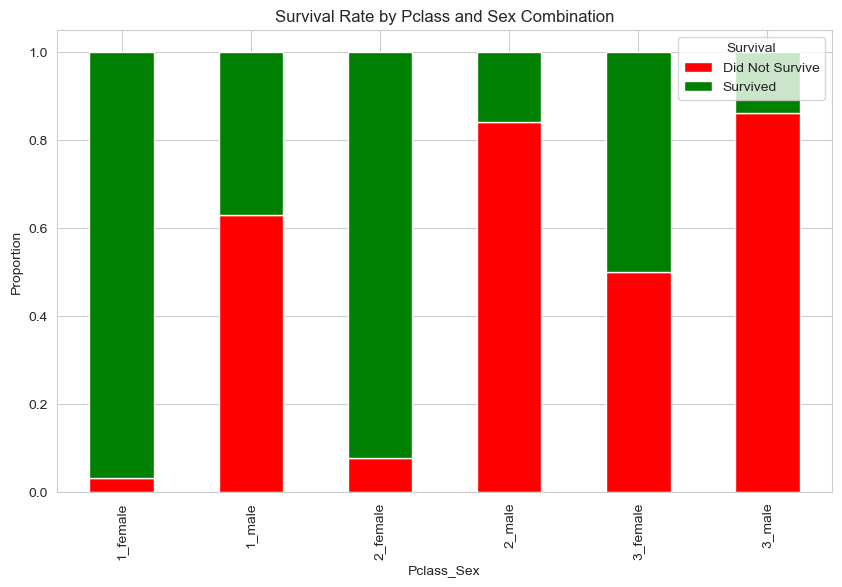

In [53]:
# Visualize survival rates based on this new feature
pclass_sex_survival = titanic_data.groupby('Pclass_Sex')['Survived'].value_counts(normalize=True).unstack()
pclass_sex_survival.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Survival Rate by Pclass and Sex Combination')
plt.ylabel('Proportion')
plt.xlabel('Pclass_Sex')
plt.legend(['Did Not Survive', 'Survived'], title="Survival")
plt.show()

7.5 Encoding Titles into Categories
Map titles into broader categories (e.g., Royalty, Military).

In [54]:
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Dr": "Professional", "Rev": "Professional",
    "Col": "Military", "Major": "Military", "Capt": "Military",
    "Lady": "Royalty", "Countess": "Royalty", "Sir": "Royalty",
    "Jonkheer": "Royalty", "Don": "Royalty", "Dona": "Royalty"
}

In [55]:
titanic_data['TitleCategory'] = titanic_data['Title'].map(title_mapping).fillna("Other")
print(titanic_data[['Title', 'TitleCategory']].head())

  Title TitleCategory
0    Mr            Mr
1   Mrs           Mrs
2  Miss          Miss
3   Mrs           Mrs
4    Mr            Mr


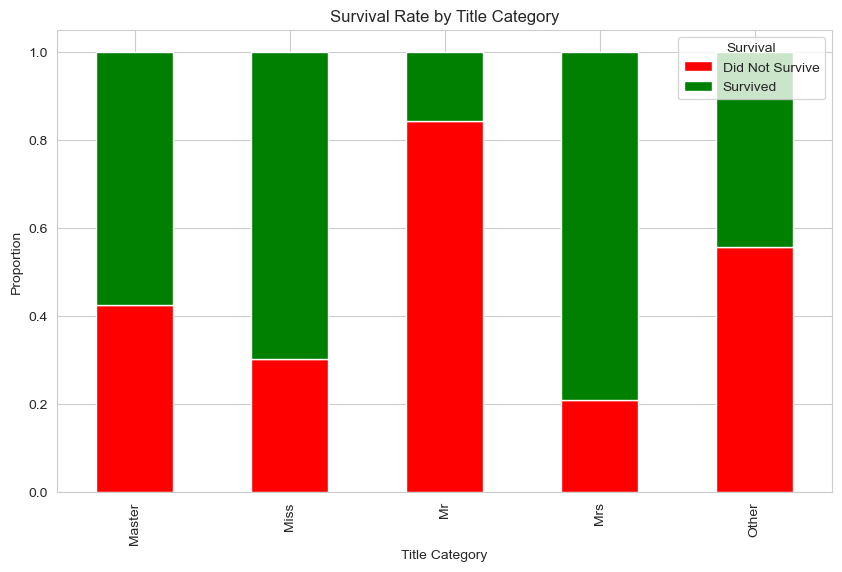

In [56]:
# Visualize survival rates by title category
title_category_survival = titanic_data.groupby('TitleCategory')['Survived'].value_counts(normalize=True).unstack()
title_category_survival.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Survival Rate by Title Category')
plt.ylabel('Proportion')
plt.xlabel('Title Category')
plt.legend(['Did Not Survive', 'Survived'], title="Survival")
plt.show()

Hands-On Machine Learning Tutorial (Part 2)
Introduction: This Jupyter Notebook builds upon the data analysis skills from Part 1, introducing machine learning, deep learning, and time series analysis using Python. It covers fundamental concepts from various Kaggle courses, providing a practical, hands-on approach to these advanced topics.

Prerequisites:

Completion of Part 1 tutorial or equivalent knowledge
Basic understanding of Python and data analysis concepts
Jupyter Notebook environment set up
Install required libraries: pandas, scikit-learn, matplotlib, seaborn, tensorflow, prophet, statsmodels
!pip install pandas scikit-learn matplotlib seaborn tensorflow prophet statsmodels keras keras.utils

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error


Load preprocessed Titanic data from Part 1 (Assuming titanic_data is already cleaned and feature-engineered)

In [58]:
# ### Download Kaggle Titanic Dataset (train.csv)
# !wget -O train.csv "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# !wget -O test.csv "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"


In [59]:
pwd

'/Users/gkim2/working/ml'

In [60]:
### Read the Dataset
titanic_data = pd.read_csv("/Users/gkim2/Downloads/datasets-master/titanic.csv")

In [61]:
# Prepare features and target
X = titanic_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

In [62]:
# Create a new feature: Family Size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [63]:
# Create age groups
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [64]:
# Extract title from Name
titanic_data['TitleCategory'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/7l/3ysc8_b96qz_9yk3fg8v_vkh0000gn/T/ipykernel_24911/3833807125.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic_data['TitleCategory'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [65]:
# Group rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic_data['TitleCategory'] = titanic_data['TitleCategory'].replace(rare_titles, 'Rare')

In [66]:
# Select features
X = titanic_data[['Sex', 'Embarked', 'TitleCategory', 'AgeGroup', 'Pclass', 'Fare', 'Age', 'FamilySize']]


In [67]:
# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'TitleCategory', 'AgeGroup', 'Age', 'FamilySize', 'Pclass', 'Fare',])

In [68]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
# Make predictions
preds = rf_model.predict(X_val)

In [71]:
# Evaluate
print(f"Accuracy: {accuracy_score(y_val, preds):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_val, preds))

Accuracy: 0.79
Confusion Matrix:
[[89 16]
 [21 53]]


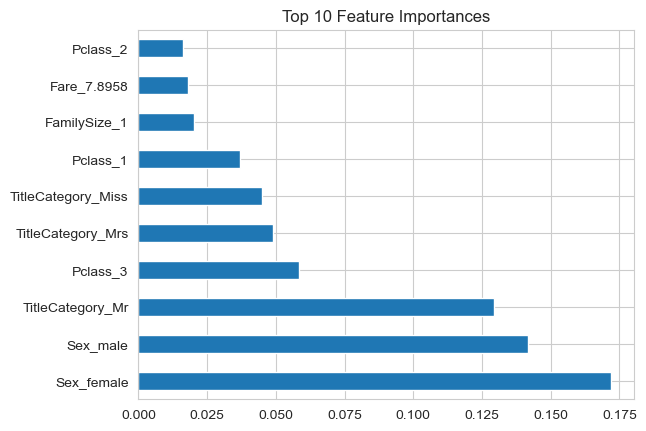

In [72]:
import matplotlib.pyplot as plt

# Feature Importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [73]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.utils import to_categorical
#from keras.utils import np_utils

/opt/miniconda3/envs/py312/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [74]:
# Load CIFAR10 data
(X_train_dl, y_train_dl), (X_test_dl, y_test_dl) = tf.keras.datasets.cifar10.load_data()

In [75]:
# Checking the number of rows (records) and columns (features)
print(X_train_dl.shape)
print(y_train_dl.shape)
print(X_test_dl.shape)
print(y_test_dl.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [76]:
print(type(X_train_dl))

<class 'numpy.ndarray'>


In [77]:
# min and max 
X_train_dl.min(), X_train_dl.max() ,y_train_dl.min(),y_train_dl.max(), X_test_dl.min(), X_test_dl.max(), y_test_dl.min(), y_test_dl.max()


(np.uint8(0),
 np.uint8(255),
 np.uint8(0),
 np.uint8(9),
 np.uint8(0),
 np.uint8(255),
 np.uint8(0),
 np.uint8(9))

In [78]:
X_train_dl.shape, y_train_dl.shape, X_test_dl.shape, y_test_dl.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [79]:
# Checking the number of unique classes
print(np.unique(y_train_dl))
print(np.unique(y_test_dl))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


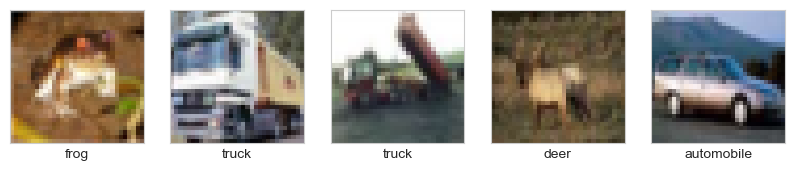

In [80]:
# Show some random training images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_dl[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_dl[i][0]])
plt.show()

In [81]:
# 50000*32*32*3= 153600000
#153600000/(28*28*255)== 768.307
153600000/250

614400.0

In [82]:
153600000/(25*25)

245760.0

In [83]:
10000*32*32*3

30720000

In [84]:
# 30720000/(10000*48*48)
30720000/(10000*16*16)

12.0

In [85]:
30720000/(10000*32*32)

3.0

In [86]:
30720000/(10000*8*8)

48.0

In [87]:
#for i in range(5):
#plt.imshow(X_test_dl[1], cmap=plt.cm.binary)
    #plt.imshow(X_train_dl[i], cmap=plt.cm.binary)
print(X_test_dl[0])
print(len(X_test_dl[0]))
print(len(X_test_dl[0][0]))

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]
32
32


In [88]:
print(X_train_dl[0])
print(len(X_train_dl[0]))
print(len(X_train_dl[0][0]))

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
32
32


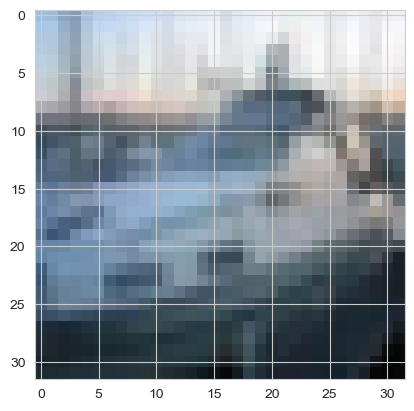

In [89]:
plt.imshow(X_test_dl[2], cmap=plt.cm.binary)

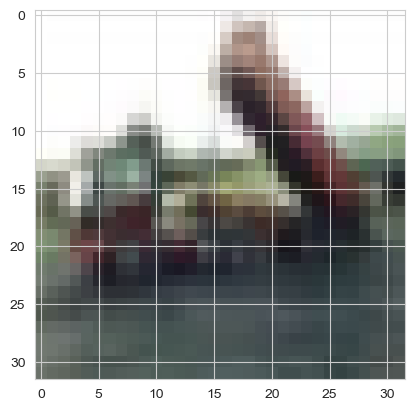

In [90]:
plt.imshow(X_train_dl[2], cmap=plt.cm.binary)

In [91]:
print(y_test_dl[0])
print(y_test_dl)
print(len(y_test_dl[0]))
# print(len(y_test_dl[0][0]))TypeError: object of type 'numpy.uint8' has no len()

[3]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
1


In [92]:
print(y_train_dl[0])
print(y_train_dl)
print(len(y_train_dl[0]))
# print(len(y_train_dl[0][0]))#TypeError: object of type 'numpy.uint8' has no len()

[6]
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
1


In [93]:
# plt.imshow(y_test_dl[2], cmap=plt.cm.binary) # not image

In [94]:
# plt.imshow(y_train_dl[2], cmap=plt.cm.binary) # not image

In [95]:
# Data Preprocess

# Converting the pixels data to float type and Standardizing (255 is the total number of pixels an image can have)
X_train_dl = X_train_dl.reshape(-1, 32, 32, 3).astype('float32') / 255.0
X_test_dl = X_test_dl.reshape(X_test_dl.shape[0], 32, 32, 3).astype('float32') / 255.0

In [96]:
print(len(X_train_dl),len(X_test_dl))

50000 10000


In [97]:
# y_train_dl = y_train_dl.reshape(-1, 25, 25, 1).astype('float32') / 255.0
# y_test_dl = y_test_dl.reshape(-1, 25, 25, 1).astype('float32') / 255.0

In [98]:
# One hot encoding the target class (labels)
num_classes = 10
train_labels = to_categorical(y_train_dl, num_classes)
test_labels = to_categorical(y_test_dl, num_classes)

In [99]:
# print(len(y_train_dl),y_train_dl.shape)
# print(len(y_test_dl),y_test_dl.shape)

In [100]:
# print(len(train_labels),train_labels.shape)
# print(len(test_labels),test_labels.shape)

In [101]:
# Build CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/opt/miniconda3/envs/py312/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
print(len(X_train_dl),len(X_test_dl),len(y_train_dl),len(y_test_dl))

50000 10000 50000 10000


In [104]:
# Train
history = model.fit(X_train_dl, y_train_dl,
                   epochs=5,
                   validation_data=(X_test_dl, y_test_dl))

# # Train
# history2 = model2.fit(X_train_dl, y_train_dl,
#                    epochs=5,
#                    validation_data=(X_test_dl, y_test_dl))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4853 - loss: 1.4504 - val_accuracy: 0.5621 - val_loss: 1.2327
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5982 - loss: 1.1391 - val_accuracy: 0.5867 - val_loss: 1.1824
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6461 - loss: 1.0113 - val_accuracy: 0.6363 - val_loss: 1.0472
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6795 - loss: 0.9105 - val_accuracy: 0.6472 - val_loss: 1.0191
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7056 - loss: 0.8440 - val_accuracy: 0.6346 - val_loss: 1.0344


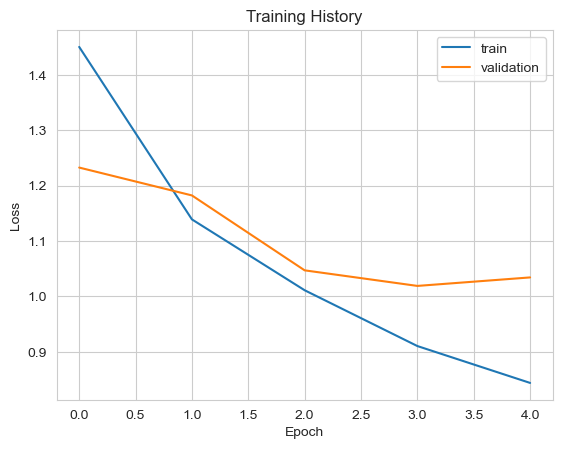

In [105]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


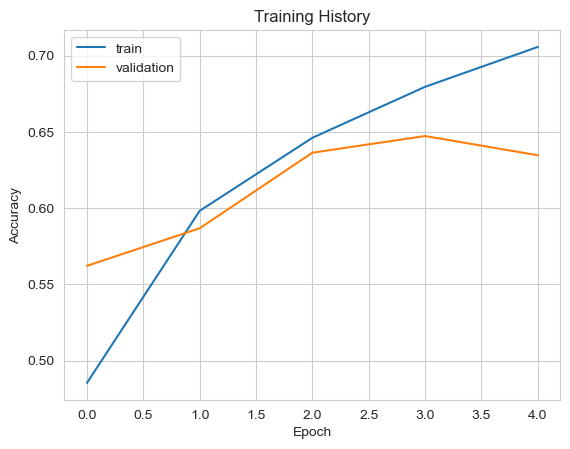

In [106]:
# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [107]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [108]:
# One hot encoding the target class (labels)
num_classes = 10
y_train_dl = to_categorical(y_train_dl, num_classes)
y_test_dl = to_categorical(y_test_dl, num_classes)

In [109]:
# Creating a sequential model and adding layers to it

model2 = Sequential()

model2.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))

model2.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.5))

model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [110]:
model2.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [111]:
# Train
history2 = model2.fit(X_train_dl, y_train_dl,
                   epochs=5,
                   validation_data=(X_test_dl, y_test_dl))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 66ms/step - accuracy: 0.4171 - loss: 1.6722 - val_accuracy: 0.4966 - val_loss: 1.3425
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.5908 - loss: 1.1558 - val_accuracy: 0.6318 - val_loss: 1.0329
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.6592 - loss: 0.9760 - val_accuracy: 0.7040 - val_loss: 0.8471
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6963 - loss: 0.8811 - val_accuracy: 0.6704 - val_loss: 0.9877
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.7237 - loss: 0.8038 - val_accuracy: 0.7091 - val_loss: 0.8470


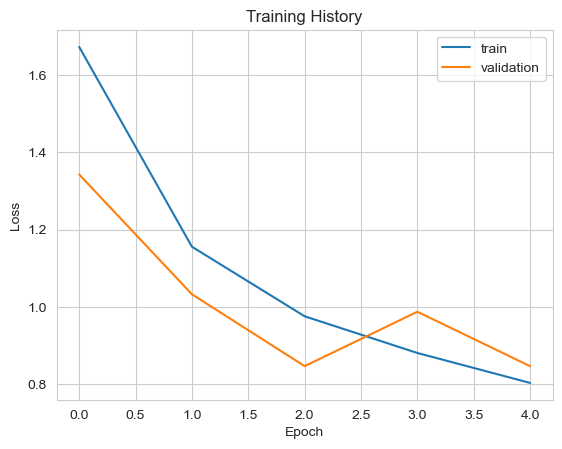

In [112]:
# Plot training history
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

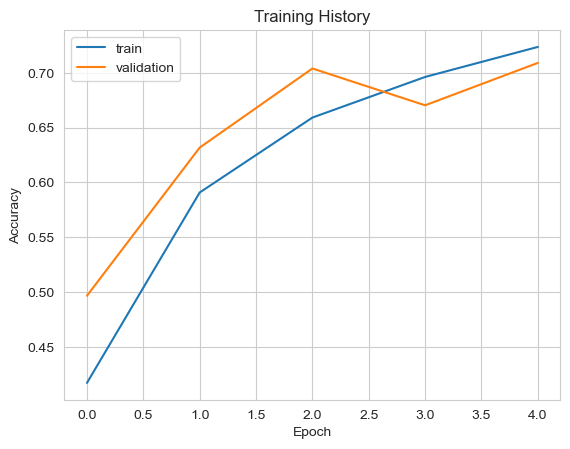

In [113]:
# Plot training history
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='validation')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [114]:
# Making the Predictions
pred = model.predict(X_test_dl)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[3.1056888e-03 3.3745787e-03 1.0963963e-02 ... 8.1674466e-03
  1.1349222e-01 3.1640525e-03]
 [5.5697272e-03 2.8549534e-01 8.0667505e-06 ... 7.0021599e-08
  7.0654273e-01 2.3749918e-03]
 [4.6961004e-01 5.5596221e-02 3.4263004e-02 ... 1.8483803e-03
  3.4904853e-01 4.4616662e-02]
 ...
 [9.3385366e-05 8.0256382e-07 2.0816050e-01 ... 3.0775189e-02
  7.5573113e-04 2.1969675e-04]
 [2.3328025e-02 4.4137228e-01 5.5434513e-03 ... 2.9608325e-04
  8.2845206e-04 3.0248065e-04]
 [1.4794442e-04 8.7503082e-04 7.5160502e-03 ... 8.9915812e-01
  8.6682390e-05 2.7738523e-04]]
[3 8 0 ... 5 4 7]


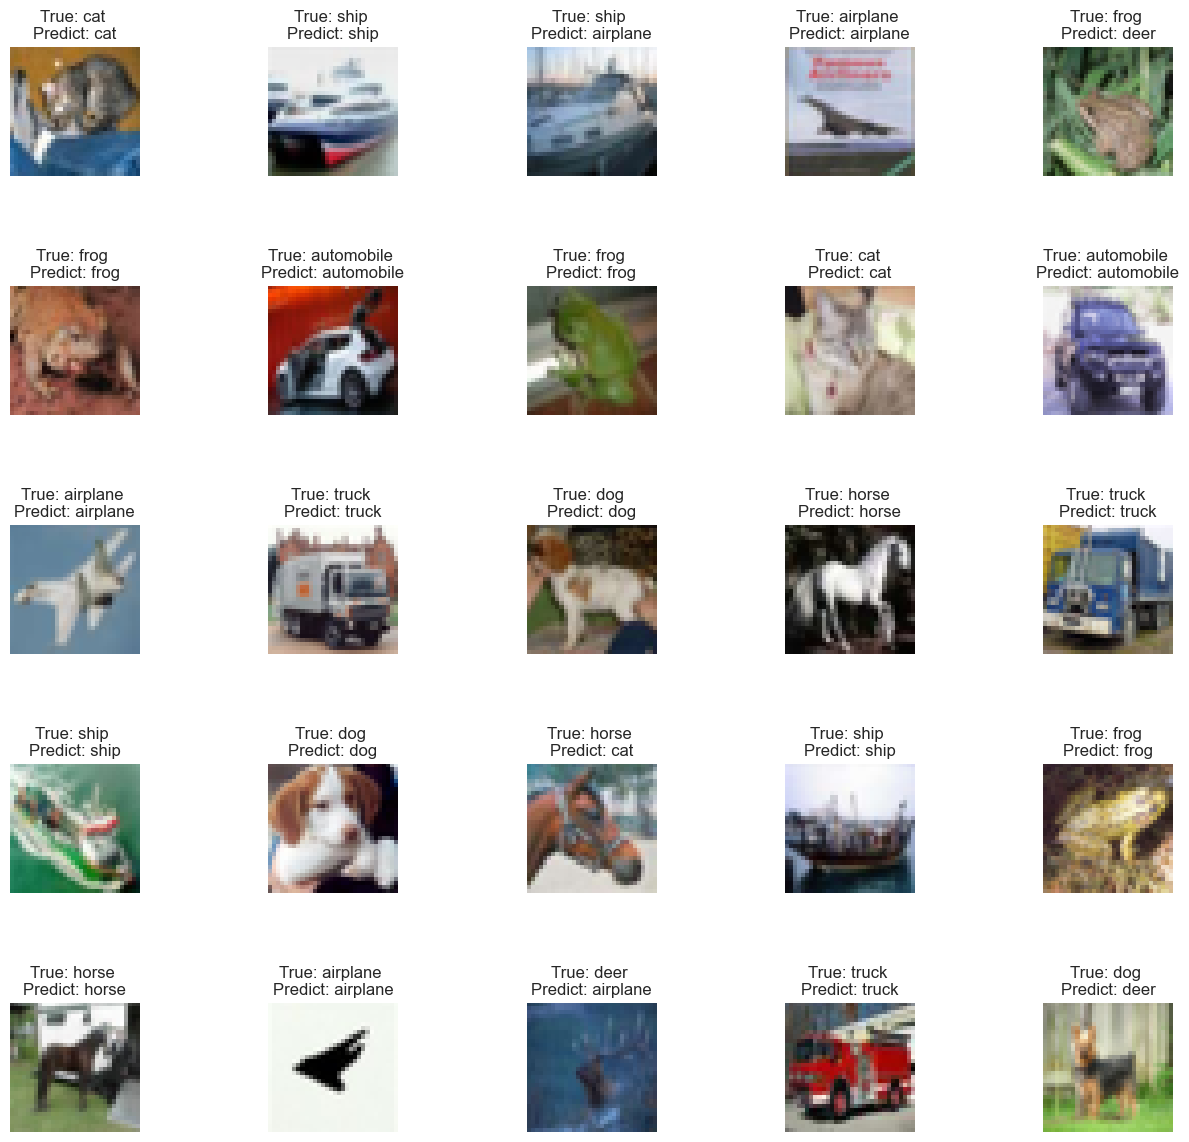

In [115]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test_dl[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test_dl[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Computer Vision: Data Augmentation
Based on "Computer Vision" course



In [116]:
# Image augmentation example
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [117]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2)

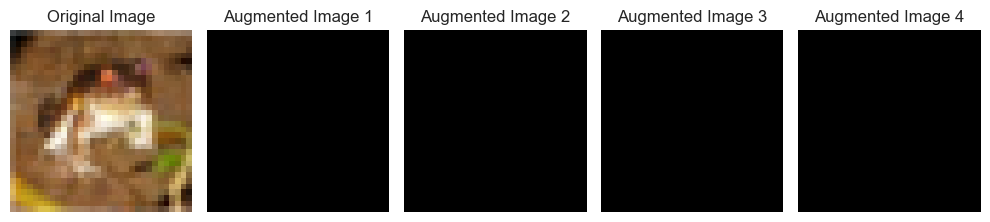

In [127]:
# Example image from the training set
img_to_augment = X_train_dl[0]

# Generate augmented images
augmented_images = datagen.flow(np.expand_dims(img_to_augment, axis=0), batch_size=1)

# Visualize the original image and some augmented versions
plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.imshow(img_to_augment)
plt.title('Original Image')
plt.axis('off')

for i in range(4):
    augmented_img = next(augmented_images)[0].astype('uint8')
    plt.subplot(1, 5, i + 2)
    plt.imshow(augmented_img)
    #plt.imshow(augmented_images[0].astype('uint8'))
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Conclusion
In this advanced tutorial, we have covered:

Machine Learning fundamentals with Random Forest
Introduction to Deep Learning with CNNs
Basic Computer Vision concepts

This notebook has provided a practical introduction to various advanced data science topics. To deepen your understanding, consider:

Experimenting with different models and hyperparameters
Exploring more advanced time series techniques
Diving deeper into deep learning architectures
Applying these concepts to different datasets and problem domains

Remember, the field of data science and machine learning is vast and rapidly evolving. Continuous learning and practice are key to mastering these skills.